##  Project



#### Suppose you have a dataset containing a lot of images of clothes with labels. You are asked to build a model to classify unseen cloth images.


- You are given a DNN model and fashion dataset. This model has overfitting problem.   
 REF: book "Hand-On Machine Learning with Sk-learn, Keras, and Tensorflow",   
 Chapter 10: pp. 297-307. I put the book code together (in the notebook)
   
   
- You are also given a link which provides you how to build a CNN model   
    REF: https://victorzhou.com/blog/keras-cnn-tutorial/
---
### In this project, you need to build models training the same dataset  

- For DNN model: you can modify the book model or build your own model:
    - use dif. structures, more/fewer layers, more/fewer neurons each layers
    - try dif. initial weights, bias, activation functions
    - work with different optimizers
    - use drop out 
    - use dif batch sizes and epoch numbers
    - overcome the overfitting
    
    - (optional) add your own ideas
    
    
       
- For CNN model: build your own model with different setup/parameters
    - layers(convolution-pooling/convolution-poole/....)
    - num_filters,
    - filter_size,
    - strides,
    - padding, 
    - activation function
    - dropout/batch/epoch
    - anything you think is important
       
       
       
- Write a report to summarize your observations(limit to 10 pages, but need to be more than 5 pages)
   - some comparisons DNN and CNN
   - the best structures (DNN and CNN) you got in term of accuracy only (no overfitting)
   - what are the important parameters
   - do not worry about the time comsuming)
   - short conclusion  


**PS: Start thinking about you final project now (you choose a topic, the format should be like this project)**

--------
# The following DNN code is taken from the book. 
# For your reference

## 0. Setup of DNN model

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras

# check if it is there
#tf.__version
#'2.0.0'

keras.__version__
#'2.2.4-tf'

'2.2.4-tf'

## 1. Loading in data

In [3]:
# load in data: fasion 10 classes of fashion data

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# check the size: 60k samples, each is 28x28 pixel picture (B/W)

X_train_full.shape
# (60000, 28, 28)

X_train_full.dtype

dtype('uint8')

In [5]:
# scale the greyness to [0,1]
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
# setup label
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

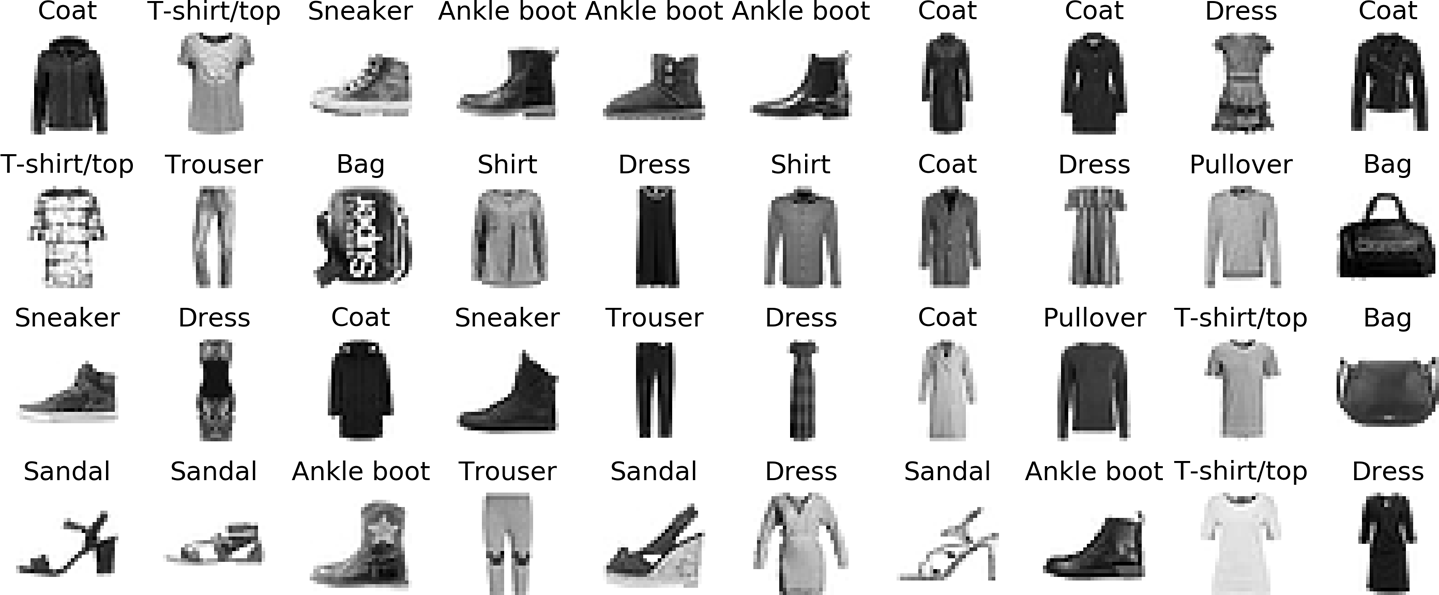

## 2. Creating the model using the Keras Sequential API 


In [7]:
# DNN, layer by layer
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
# summmary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### you can check the hidden layer's parameters
 - name
 - dense or not
 - weights
 - bias

In [9]:
model.layers
# [<tensorflow.python.keras.layers.core.Flatten at 0x132414e48>,
# <tensorflow.python.keras.layers.core.Dense at 0x1324149b0>,
# <tensorflow.python.keras.layers.core.Dense at 0x1356ba8d0>,
# <tensorflow.python.keras.layers.core.Dense at 0x13240d240>]

hidden1 = model.layers[1]
hidden1.name
# 'dense'

model.get_layer('dense') is hidden1
# True

True

In [10]:
weights, biases = hidden1.get_weights()
weights
# array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
# 0.03859074, -0.06889391],
# ...,
# [-0.06022581, 0.01577859, -0.02585464, ..., -0.00527829,
# 0.00272203, -0.06793761]], dtype=float32)


weights.shape
# #(784, 300)

biases
#array([0., 0., 0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0.], dtype=float32)

biases.shape
# (300,)

(300,)

- weights: initialized the connection weights randomly (which is needed to break symmetry)

- biases: initialized to zeros, which is fine. use bias_initializer to set differently

If you ever want to use a different initialization method, you can set kernel_initializer

## 3. Compiling the model: call its compile() method to specify

 - the loss function
 - the optimizer to use. 
 - Optionally, you can specify a list of extra metrics to compute during training and evaluation:

EX: model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## 4. Training and evaluating the model: fit method with training data

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.7228 - accuracy: 0.7607 - val_loss: 0.5168 - val_accuracy: 0.8244
Epoch 2/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.4871 - accuracy: 0.8301 - val_loss: 0.4499 - val_accuracy: 0.8472
Epoch 3/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4409 - accuracy: 0.8443 - val_loss: 0.4117 - val_accuracy: 0.8596
Epoch 4/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4152 - accuracy: 0.8538 - val_loss: 0.3974 - val_accuracy: 0.8668
Epoch 5/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3945 - accuracy: 0.8617 - val_loss: 0.4107 - val_accuracy: 0.8536
Epoch 6/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3779 - accuracy: 0.8668 - val_loss: 0.3806 - val_accuracy: 0.8680
Epoch 7/30
55000/55000 [==============================] -

#### Use a dictionary to create a pandas DataFrame and call its plot()

In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install  matplotlib

Note: you may need to restart the kernel to use updated packages.


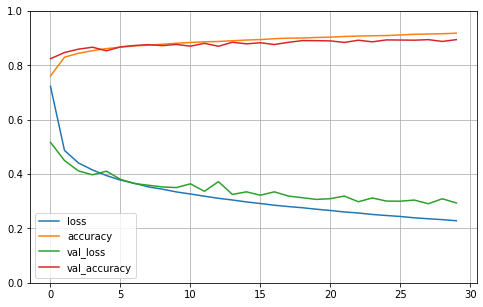

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

- you can see there are overfitting: 89% validation accuracy should be the covergent point

## 5. Testing accuracy

In [16]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 74.3246 - accuracy: 0.8274


[74.32455629119873, 0.8274]

## 6. Apply the model:   make predictions

In [17]:
# test the first 3 samples
X_new = X_test[:3]

# prediction probability
y_proba = model.predict(X_new)
print(y_proba)

y_proba.round(2)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
import numpy as np
y_pred = model.predict_classes(X_new)

y_pred 
# array([9, 2, 1])

np.array(class_names)[y_pred]
#array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

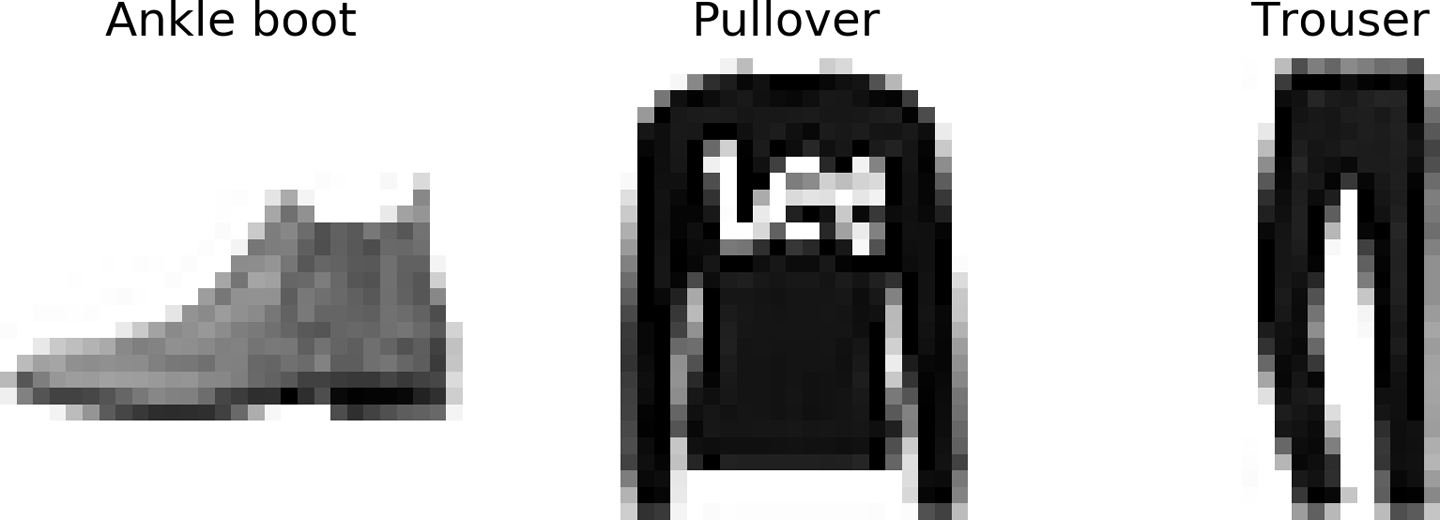

## Those three items are correctly classified.

In [19]:
# more testing

predictions = model.predict(X_test)

# print the first 10 predictions
print("predicted:  ", end = ' ')
for i in range(10):
    print(np.argmax(predictions[i]), end =" " ) 

# print the first 10 real labess
print("\nreal label: ", end = ' ')
for i in range(10):
    print(y_test[i], end=" " )

predicted:   9 2 1 1 6 1 4 6 5 7 
real label:  9 2 1 1 6 1 4 6 5 7 

In [20]:
# end of DNN

## 0. Setup of CNN model

In [21]:
#pip install tensorflow

In [22]:
#pip install keras

In [24]:
#import tensorflow as tf
#from tensorflow import keras

# check if it is there
#tf.__version
#'2.0.0'

keras.__version__
#'2.2.4-tf'

'2.2.4-tf'

## 1. Loading in data

In [25]:
# your CNN model start here
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
    
    

## 2. Creating the model using the Keras Sequential API 


In [26]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

- weights: initialized the connection weights randomly (which is needed to break symmetry)

- biases: initialized to zeros, which is fine. use bias_initializer to set differently

If you ever want to use a different initialization method, you can set kernel_initializer

## 3. Compiling the model: call its compile() method to specify

 - the loss function
 - the optimizer to use. 
 - Optionally, you can specify a list of extra metrics to compute during training and evaluation:

EX: model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 291s 5ms/sample - loss: 0.7310 - accuracy: 0.7426 - val_loss: 0.3961 - val_accuracy: 0.8468
Epoch 2/10
55000/55000 [==============================] - 285s 5ms/sample - loss: 0.4354 - accuracy: 0.8549 - val_loss: 0.3408 - val_accuracy: 0.8772
Epoch 3/10
55000/55000 [==============================] - 291s 5ms/sample - loss: 0.3750 - accuracy: 0.8726 - val_loss: 0.3369 - val_accuracy: 0.8746
Epoch 4/10
55000/55000 [==============================] - 296s 5ms/sample - loss: 0.3401 - accuracy: 0.8861 - val_loss: 0.3094 - val_accuracy: 0.8916
Epoch 5/10
55000/55000 [==============================] - 286s 5ms/sample - loss: 0.3166 - accuracy: 0.8930 - val_loss: 0.2918 - val_accuracy: 0.8968
Epoch 6/10
55000/55000 [==============================] - 285s 5ms/sample - loss: 0.2987 - accuracy: 0.8992 - val_loss: 0.2860 - val_accuracy: 0.9028
Epoch 7/10
55000/55000 [===========================

In [28]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [29]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[28, 28, 1])) #changed from 224, 224, 3
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 7, 7, 64)         

#### you can check the hidden layer's parameters
 - name
 - dense or not
 - weights
 - bias

In [31]:
model.layers
# [<tensorflow.python.keras.layers.core.Flatten at 0x132414e48>,
# <tensorflow.python.keras.layers.core.Dense at 0x1324149b0>,
# <tensorflow.python.keras.layers.core.Dense at 0x1356ba8d0>,
# <tensorflow.python.keras.layers.core.Dense at 0x13240d240>]

hidden1 = model.layers[1]
hidden1.name
# 'dense'

#model.get_layer('dense') is hidden1
# True

'batch_normalization'

In [35]:
#weights, biases = hidden1.get_weights()
#weights
#array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046, 0.03859074, -0.06889391], ...,
#[-0.06022581, 0.01577859, -0.02585464, ..., -0.00527829, 0.00272203, -0.06793761]], dtype=float32)


weights.shape
#(784, 300)

biases
#array([0., 0., 0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0.], dtype=float32)

biases.shape
# (300,)

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## 4. Training and evaluating the model: fit method with training data

In [37]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2948s 54ms/sample - loss: 0.5311 - accuracy: 0.8168 - val_loss: 0.3529 - val_accuracy: 0.8682
Epoch 2/30
55000/55000 [==============================] - 3214s 58ms/sample - loss: 0.3297 - accuracy: 0.8795 - val_loss: 0.3173 - val_accuracy: 0.8822
Epoch 3/30
55000/55000 [==============================] - 2486s 45ms/sample - loss: 0.2700 - accuracy: 0.9022 - val_loss: 0.2949 - val_accuracy: 0.8884
Epoch 4/30
55000/55000 [==============================] - 2377s 43ms/sample - loss: 0.2363 - accuracy: 0.9124 - val_loss: 0.2682 - val_accuracy: 0.9034
Epoch 5/30
55000/55000 [==============================] - 2573s 47ms/sample - loss: 0.2090 - accuracy: 0.9212 - val_loss: 0.2756 - val_accuracy: 0.8978
Epoch 6/30
55000/55000 [==============================] - 3080s 56ms/sample - loss: 0.1865 - accuracy: 0.9302 - val_loss: 0.2622 - val_accuracy: 0.9096
Epoch 7/30
55000/55000 [===============

#### Use a dictionary to create a pandas DataFrame and call its plot()

In [39]:
pip install pandas

In [40]:
pip install  matplotlib

Note: you may need to restart the kernel to use updated packages.


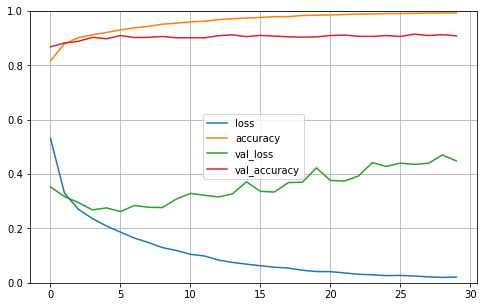

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

- you can see there are overfitting: 89% validation accuracy should be the covergent point

## 5. Testing accuracy

In [42]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.4575 - accuracy: 0.9092


[0.4575268532908522, 0.9092]

## 6. Apply the model:   make predictions

In [43]:
# test the first 3 samples
X_new = X_test[:3]

# prediction probability
y_proba = model.predict(X_new)
print(y_proba)

y_proba.round(2)

[[1.7869042e-09 8.0289851e-08 3.1415266e-09 1.3512634e-07 5.8434750e-09
  7.9806358e-07 4.1556298e-08 1.9004925e-05 1.6780553e-09 9.9997997e-01]
 [3.5693498e-07 2.1658402e-06 9.9996614e-01 5.1410160e-07 1.8619845e-05
  7.0709262e-07 1.1344469e-05 2.3137903e-07 2.1820650e-08 4.5216499e-08]
 [6.4423957e-06 9.9998939e-01 1.3690135e-06 6.0395351e-08 2.1239953e-07
  3.9815646e-07 1.4794549e-06 1.3577659e-07 5.8833695e-08 5.5625463e-07]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
import numpy as np
y_pred = model.predict_classes(X_new)

y_pred 
# array([9, 2, 1])

np.array(class_names)[y_pred]
#array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

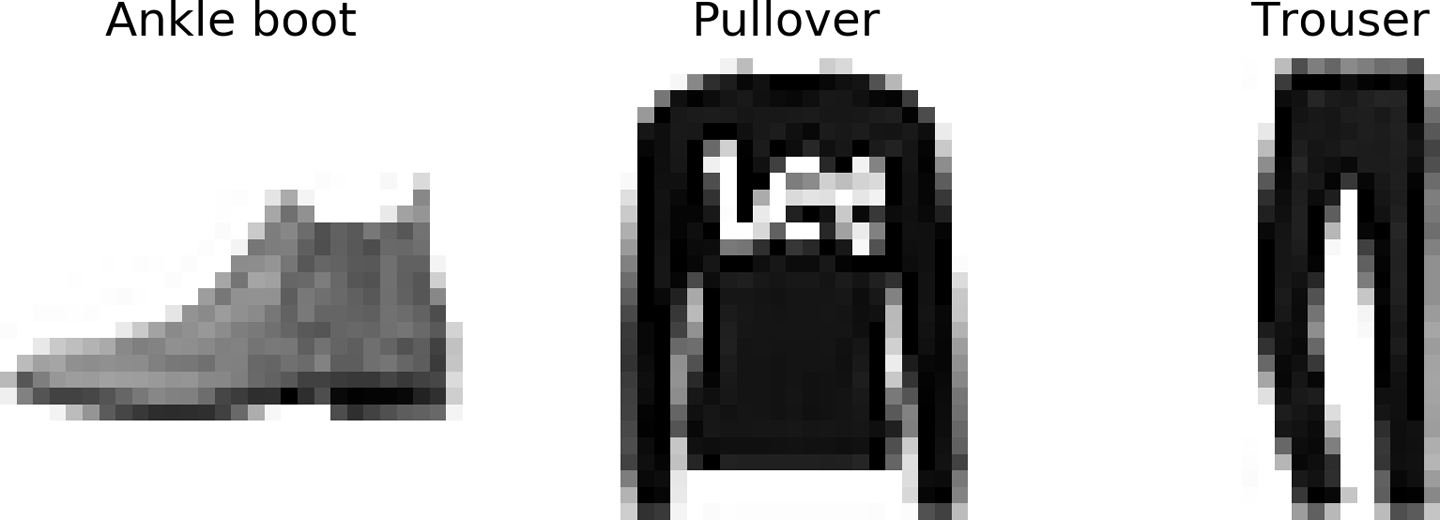

## Those three items are correctly classified.

In [45]:
# more testing

predictions = model.predict(X_test)

# print the first 10 predictions
print("predicted:  ", end = ' ')
for i in range(10):
    print(np.argmax(predictions[i]), end =" " ) 

# print the first 10 real labess
print("\nreal label: ", end = ' ')
for i in range(10):
    print(y_test[i], end=" " )

predicted:   9 2 1 1 6 1 4 6 5 7 
real label:  9 2 1 1 6 1 4 6 5 7 

In [46]:
# end of CNN; credit help from: https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb 